<a href="https://colab.research.google.com/github/danilo-uea/RNA-2021.1-AA1.2/blob/main/RNA_AA_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais - Atividade Avaliativa 1.2
> Criado por: Danilo Frazão & Yasser Tuma




In [192]:
import pandas as pd
import numpy as np

---
## Ocorrências:
  O DataSet tem no total 243.984 casos.

## Atributos
  Os atributos deste DataSet são:

*   Data em que houve alguma evolução;
*   Data em que ocorreu a notificação;
*   Data em que foram notados os sintomas;
*   Classificação (resultado dos exames);
*   Conclusão (estado final do paciente);
*   Origem dos exames;
*   Existencia de comorbidade cardiaca;
*   Existencia de comorbidade cromossomica;
*   Existencia de comorbidade diabetes;
*   Existencia de comorbidade hemato;
*   Existencia de comorbidade imunologica;
*   Existencia de comorbidade neurologica;
*   Existencia de comorbidade obessidade;
*   Existencia de comorbidade renal;
*   Existencia de comorbidade respiratoria;
*   Criterio de avaliação dos exames;
*   Etnia do indivíduo;
*   Evoluçao do seu quadro clínico;
*   Idade do indivíduo;
*   Faixa etária do indivíduo;
*   Se o indivíduo é uma gestante;
*   Se o indivíduo é um profissional da saúde;
*   Raça do indivíduo;
*   se notificação;
*   Sexo do indivíduo;
*   Existencia do sintoma de dispneia;
*   Existencia do sintoma de febre;
*   Existencia de sintomas na garganta;
*   Existencia do sintoma de tosse;
*   Existencia de outros sintomas;
*   Tipo do SRAG;
*   Número de testes de anticorpos realizados;
*   Número de testes de antigeno realizados;
*   Número de testes PCR realizados;
*   Bairro em que o indivíduo reside;
*   Bairro em que o indivíduo vive baseando-se no mapa;
*   Distrito em que a pessoa reside;
*   Taxa de transmição;

In [193]:
# from google.colab import drive
# drive.mount('/content/drive')

In [194]:
# covid = pd.read_csv("/content/drive/My Drive/Colab Notebooks/RNA/Manaus.csv", sep = ";") # Yasser
covid = pd.read_csv("/content/drive/MyDrive/dados_colab/RNA/Manaus.csv", sep = ";", low_memory=False) # Danilo

In [195]:
print('O arquivo possui {} atributos no total:'.format(len(covid.columns)))
atributos = covid.columns.values
for i in range(len(atributos)):
  print(atributos[i])

O arquivo possui 39 atributos no total:
_dt_evolucao
_dt_notificacao
_dt_sintomas
_classificacao
_conclusao
_origem
_comorb_cardio
_comorb_cromossomica
_comorb_diabetes
_comorb_hemato
_comorb_hepatica
_comorb_imuno
_comorb_neurologica
_comorb_obessidade
_comorb_renal
_comorb_respiratoria
_criterio
_etnia
_evolução
_idade
_faixa etária
_gestante
_profiss_saude
_raca
_se_notificacao
_sexo
_sintoma_dispneia
_sintoma_febre
_sintoma_garganta
_sintoma_tosse
_sintoma_outros
_srag
_teste_anticorpo
_teste_antigeno
_teste_pcr
_bairro
_bairro_mapa
_distrito
_taxa


---
## Limpeza dos dados
  Para esta atividade, iremos apenas usar os casos cuja a classificação sejam de casos confirmados, o DataSet apresenta no total 80420 casos confirmados. O primeiro caso confirmado neste DataSet foi em 16 de Fevereiro de 2020, e o ultimo caso confirmado foi em 29 de Dezembro de 2020.

  Para este trabalho, foram removidas colunas que não serão uteis para o escopo das atividades e os casos que apresentam algum dado faltante. 
  Restaram apenas 9 colunas (_dt_notificacao, _classificacao, _conclusao, _idade, _sexo, _teste_anticorpo, _teste_antigeno, _teste_pcr e _bairro), e 246 casos.




In [196]:
covid = covid[covid["_classificacao"] == "Confirmado"]

In [197]:
print('Um total de {} casos confirmados'.format(len(covid)))

Um total de 80420 casos confirmados


In [198]:
dates = covid['_dt_notificacao'].dropna() # Exclui linhas com elementos vazios ou nulos
dates = pd.to_datetime(dates, format='%d/%m/%Y %H:%M')
dates = dates.sort_values()
primeiro = dates.iloc[0]
ultimo = dates.iloc[-1]
print("Data do primeiro caso notificado: ")
print(primeiro)
print("Data do primeiro caso notificado: ")
print(ultimo)

Data do primeiro caso notificado: 
2020-02-16 00:00:00
Data do primeiro caso notificado: 
2020-12-29 00:00:00


In [199]:
#removendo as colunas e as linhas com elementos nulos, sobraram apenas 240 linhas
if (len(covid.columns.values) == 39):
  covid.drop(["_bairro_mapa","_taxa","_origem","_distrito","_faixa etária","_sintoma_outros","_sintoma_tosse","_sintoma_garganta","_sintoma_febre","_sintoma_dispneia","_srag","_se_notificacao","_evolução","_criterio","_gestante","_raca","_dt_sintomas","_dt_evolucao","_profiss_saude","_etnia","_dt_sintomas","_comorb_cardio","_comorb_cromossomica","_comorb_diabetes","_comorb_hemato","_comorb_hepatica","_comorb_imuno","_comorb_neurologica","_comorb_obessidade","_comorb_renal","_comorb_respiratoria"],axis=1,inplace=True)
  #covid = covid.dropna(subset=['_idade'])
  covid = covid.dropna() # remove todas as linhas com nop minimo um atributo nulo

atributos = covid.columns.values
for i in range(len(atributos)):
  print(atributos[i])

_dt_notificacao
_classificacao
_conclusao
_idade
_sexo
_teste_anticorpo
_teste_antigeno
_teste_pcr
_bairro


---
## Análise exploratória dos dados:


1. Quantos exemplos e atributos há na base de dados após a limpeza e organização?


> A limpeza e a organização da base de dados resultou em um total de 246 exemplos, cada um com 9 atributos (_dt_notificacao, _classificacao, _conclusao, _idade, _sexo, _teste_anticorpo, _teste_antigeno, _teste_pcr e _bairro), nenhum atributo de nenhum exemplo na base de dados tem valor nulo.



In [200]:
# 1.1
print('Qtd elementos: {}'.format(len(covid)))
print('Qtd atributos: {}'.format(len(covid.columns.values)))

Qtd elementos: 246
Qtd atributos: 9



2.   Qual a porcentagem de indivíduos recuperados em relação ao todo?

In [201]:
# 1.2
total_recuperados = len(covid[covid['_conclusao'] == 'Recuperado'])
print("Total de recuperados: " + str(total_recuperados))
print("Porcentagem: " + str(total_recuperados/len(covid)))

Total de recuperados: 245
Porcentagem: 0.9959349593495935


3.   Os casos acometeram mais indivíduos do sexo masculino ou feminino?

In [202]:
# 1.3
total_masculino = len(covid[covid['_sexo'] == 'M'])
total_feminino = len(covid[covid['_sexo'] == 'F'])
print("total de individuos masculinos que foram acometidos: " + str(total_masculino))
print("total de individuos femininos que foram acometidos: " + str(total_feminino))

total de individuos masculinos que foram acometidos: 83
total de individuos femininos que foram acometidos: 163


4. Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o
indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [203]:
# 1.4
covid = covid.dropna(subset=['_idade']) # remove todas as linhas com nop minimo um atributo nulo
idades = covid['_idade'].sort_values()
mais_novo = idades.iloc[0]
mais_velho = idades.iloc[-1]
media = idades.mean()
desvio_padrao = idades.std()

if (mais_velho > 80):
  mais_velho = 'Acima de 80 anos'

print("Idade do individuo mais novo: " + str(mais_novo))
print("Idade do individuo mais velho: " + str(mais_velho))
print("Media das idades: " + str(media))
print("Desvio padrao das idades: " + str(desvio_padrao))

Idade do individuo mais novo: 19.0
Idade do individuo mais velho: 74.0
Media das idades: 42.142276422764226
Desvio padrao das idades: 11.138464395169661


Devido a inconsistencias em relação aos nomes dos bairros devido a forma como foram inseridos, para padronizar os nomes dos bairros, iremos considerar que dois nomes se referem ao mesmo bairro se suas 5 primeiras letras forem iguais, e iremos remover as acentuações e considera-los em caixa alta, foi adicionado uma nova coluna na base de dados (_bairro_id) contendo o identificador do bairro de forma padronizada.

5. Qual o bairro com maior incidência de casos?

6. Quais os três bairros com maior incidência de casos recuperados?

In [204]:
covid['_bairro_id'] = covid['_bairro'].str.extract(r'(^.{0,5})') #extrai os primeiros 5 caracteres e os adiciona em uma nova coluna em covid
covid['_bairro_id'] = covid['_bairro_id'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') # remove as acentuações
covid['_bairro_id'] = covid['_bairro_id'].str.upper() # torna todos os itens em caixa alta
covid['_bairro_id'].unique()

array(['NOVA ', 'GILBE', 'SAO F', 'LAGO ', 'FLORE', 'COMPE', 'CRESP',
       'NOSSA', 'CHAPA', 'MORRO', 'SANTO', 'ALEIX', 'PONTA', 'REDEN',
       'RAIZ', 'TANCR', 'DISTR', 'PARQU', 'SAO J', 'COLON', 'LIRIO',
       'TARUM', 'SANTA', 'BETAN', 'CENTR', 'MONTE', 'LIRO ', 'CACHO',
       'DA PA', 'PQ 10', 'DOM P', 'JAPII', 'ALVOR', 'JORGE', 'PLANA',
       'ARMAN', 'NAO I', 'SAO G', 'CIDAD', 'PETRO', 'COROA', 'NOVO ',
       'ADRIA', 'VILA ', 'ZUMBI', 'COL O', 'PRESI', 'APARE', 'MANOA',
       'TERRA', 'PQ DE', 'GLORI', 'APART', 'SAO R', 'ELDOR', 'PAZ'],
      dtype=object)

In [205]:
# 1.5 e 1.6
maior_freq = covid['_bairro_id'].mode()
recuperados = covid[covid['_conclusao'] == 'Recuperado']
freqs_recuperados = recuperados['_bairro_id'].value_counts()
print("Bairro com a maior frequencia: " + maior_freq[0])
print("\nOs 3 bairros com a maior incidencia de casos recuperados")
print(freqs_recuperados.index[0])
print(freqs_recuperados.index[1])
print(freqs_recuperados.index[2])

Bairro com a maior frequencia: SAO J

Os 3 bairros com a maior incidencia de casos recuperados
SAO J
COMPE
CIDAD


7. Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.

In [206]:
 # 1.7
num_anticorpo = covid['_teste_anticorpo'].sum()
num_antigeno = covid['_teste_antigeno'].sum()
num_pcr = covid['_teste_pcr'].sum()
total = num_anticorpo + num_antigeno + num_pcr
print("Testes anticorpo\nTotal de aplicacoes: " + str(num_anticorpo) + "\nProporcao: " + str((num_anticorpo/total) * 100) + " %\n")
print("Testes antigeno\nTotal de aplicacoes: " + str(num_antigeno) + "\nProporcao: " + str((num_antigeno/total) * 100) + " %\n")
print("Testes pcr\nTotal de aplicacoes: " + str(num_pcr) + "\nProporcao: " + str((num_pcr/total) * 100) + " %\n")

Testes anticorpo
Total de aplicacoes: 350.0
Proporcao: 34.89531405782652 %

Testes antigeno
Total de aplicacoes: 287.0
Proporcao: 28.614157527417746 %

Testes pcr
Total de aplicacoes: 366.0
Proporcao: 36.49052841475574 %



8. Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta taxa, considere a fração do total de óbitos pelo total de casos.

In [207]:
#1.8
total_obitos = len(covid[covid['_conclusao'] != 'Recuperado'])
print("Total de obitos: " + str(total_obitos))
print("Porcentagem: " + str(total_obitos/len(covid)))

Total de obitos: 1
Porcentagem: 0.0040650406504065045


9. Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o
número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue
o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é
positiva ou negativa, e qual sua intensidade.

In [208]:
#1.9
#não tenho certeza se é isso o que ela pediu
idade_sort = covid.sort_values(by=['_idade'])
idade_sort.corr(method='pearson')

,_idade,_teste_anticorpo,_teste_antigeno,_teste_pcr
_idade,1.000000,0.053952,0.036098,0.118860
_teste_anticorpo,0.053952,1.000000,-0.065584,0.184248
_teste_antigeno,0.036098,-0.065584,1.000000,0.091180
_teste_pcr,0.118860,0.184248,0.091180,1.000000


---
## Visualização de dados:


1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual.


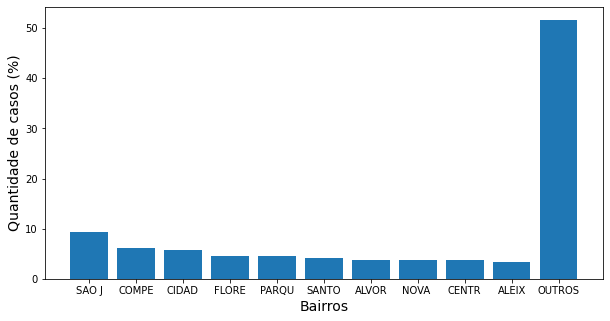

In [209]:
# 2.1
import matplotlib.pyplot as plt

nomes = []
valores = []
total_casos = len(covid)
soma = 0

ordem_freq = covid['_bairro_id'].value_counts()

for i in range(10):
  valor = 100 * (ordem_freq[i]/total_casos)
  soma = soma + valor
  valores.append(valor)
  nomes.append(ordem_freq.index[i])

valores.append(100 - soma)
nomes.append('OUTROS')

figura1, ax_1 = plt.subplots(figsize=(10, 5))
ax_1.bar(nomes, valores)
ax_1.set_ylabel('Quantidade de casos (%)', size=14)
ax_1.set_xlabel('Bairros', size=14)
figura1.show()

2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

> Existe um outlier no sexo feminino

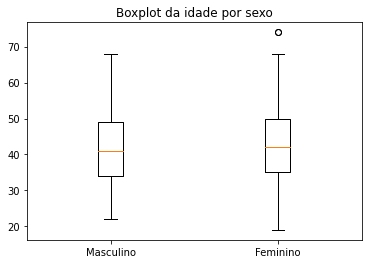

In [210]:
# 2.2 
masculino = covid[covid["_sexo"] == "M"]
masculino = np.array(masculino['_idade'], dtype=object)
feminino = covid[covid["_sexo"] == "F"]
feminino = np.array(feminino['_idade'], dtype=object)

labels = ['Masculino', 'Feminino']

data = np.array([masculino, feminino], dtype=object)

figura_2, ax_2 = plt.subplots()
ax_2.set_title('Boxplot da idade por sexo')
ax_2.boxplot(data, labels=labels)
figura_2.show()

3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados.

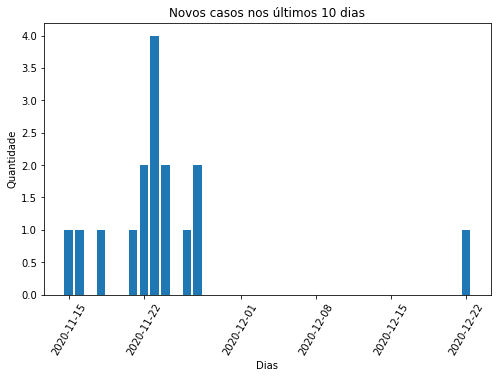

In [211]:
# 2.3
nomes = []
valores = []

dates = covid['_dt_notificacao'].dropna() # Exclui linhas com elementos vazios ou nulos
dates = pd.to_datetime(dates, format='%d/%m/%Y %H:%M')
data_qtd = dates.value_counts()
data_ordem = dates.sort_values(ascending = False)
data_ordem = data_ordem.unique()

for i in range(9, -1, -1):
  valores.append(data_qtd[data_ordem[i]])
  nomes.append(data_ordem[i])

figura3, ax_3 = plt.subplots(figsize=(8, 5))
ax_3.bar(nomes, valores)
ax_3.set(xlabel='Dias', ylabel='Quantidade', title='Novos casos nos últimos 10 dias')
plt.xticks(rotation=60)
figura3.show()

4. Repita o gráfico anterior considerando o número de casos recuperados.

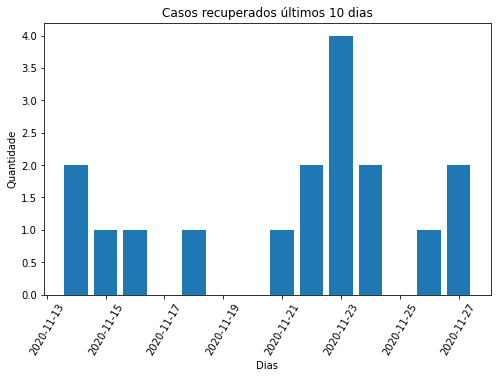

In [212]:
# 2.4
nomes = []
valores = []

recuperados = covid[covid['_conclusao'] == 'Recuperado']
dates = recuperados['_dt_notificacao'].dropna() # Exclui linhas com elementos vazios ou nulos
dates = pd.to_datetime(dates, format='%d/%m/%Y %H:%M')
data_qtd = dates.value_counts()
data_ordem = dates.sort_values(ascending = False)
data_ordem = data_ordem.unique()

for i in range(9, -1, -1):
  valores.append(data_qtd[data_ordem[i]])
  nomes.append(data_ordem[i])

figura3, ax_3 = plt.subplots(figsize=(8, 5))
ax_3.bar(nomes, valores)
ax_3.set(xlabel='Dias', ylabel='Quantidade', title='Casos recuperados últimos 10 dias')
plt.xticks(rotation=60)
figura3.show()

5. Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.).

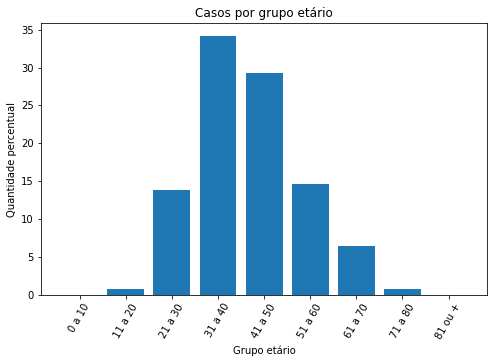

In [213]:
# 2.5
idades = covid["_idade"]
idades = idades.value_counts()

nomes = []
nomes.append('0 a 10')
nomes.append('11 a 20')
nomes.append('21 a 30')
nomes.append('31 a 40')
nomes.append('41 a 50')
nomes.append('51 a 60')
nomes.append('61 a 70')
nomes.append('71 a 80')
nomes.append('81 ou +')

valores = []
valores.append(0)
valores.append(0)
valores.append(0)
valores.append(0)
valores.append(0)
valores.append(0)
valores.append(0)
valores.append(0)
valores.append(0)

for i in range(len(idades)):
  if (idades.index[i] >= 0 and idades.index[i] <= 10):
    valores[0] = valores[0] + idades[idades.index[i]]
  if (idades.index[i] >= 11 and idades.index[i] <= 20):
    valores[1] = valores[1] + idades[idades.index[i]]
  if (idades.index[i] >= 21 and idades.index[i] <= 30):
    valores[2] = valores[2] + idades[idades.index[i]]
  if (idades.index[i] >= 31 and idades.index[i] <= 40):
    valores[3] = valores[3] + idades[idades.index[i]]
  if (idades.index[i] >= 41 and idades.index[i] <= 50):
    valores[4] = valores[4] + idades[idades.index[i]]
  if (idades.index[i] >= 51 and idades.index[i] <= 60):
    valores[5] = valores[5] + idades[idades.index[i]]
  if (idades.index[i] >= 61 and idades.index[i] <= 70):
    valores[6] = valores[6] + idades[idades.index[i]]
  if (idades.index[i] >= 71 and idades.index[i] <= 80):
    valores[7] = valores[7] + idades[idades.index[i]]
  if (idades.index[i] >= 81):
    valores[8] = valores[8] + idades[idades.index[i]]

total = len(covid)

for i in range(len(valores)):
  valores[i] = (valores[i] * 100) / total

figura5, ax_5 = plt.subplots(figsize=(8, 5))
ax_5.bar(nomes, valores)
ax_5.set(xlabel='Grupo etário', ylabel='Quantidade percentual', title='Casos por grupo etário')
plt.xticks(rotation=60)
figura5.show()

6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo.

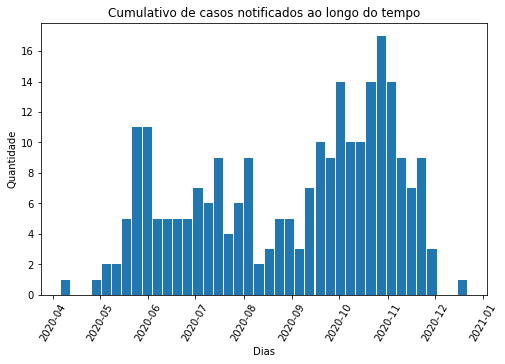

In [214]:
# 2.6
nomes = []
valores = []

dates = covid['_dt_notificacao'].dropna()         # Exclui linhas com elementos vazios ou nulos
dates = pd.to_datetime(dates, format='%d/%m/%Y %H:%M')
data_qtd = dates.value_counts()                   # Extrai a quantidade de casos notificados por data
data_ordem = dates.sort_values(ascending = False) # Ordena as datas

figura6, ax_6 = plt.subplots(figsize=(8, 5))
ax_6.hist(data_ordem, 40, rwidth=0.9)
ax_6.set(xlabel='Dias', ylabel='Quantidade', title='Cumulativo de casos notificados ao longo do tempo')
plt.xticks(rotation=60)
figura6.show()

7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?


> Existe uma tendência de uma maior quantidade de casos nas idades entre 32 e 45 anos.



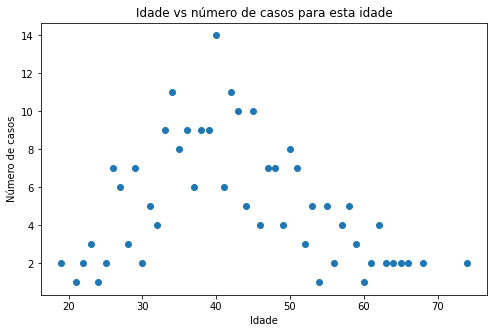

In [215]:
# 2.7
dados = covid["_idade"]
dados = dados.value_counts() # A frequência de casos por idade

idade = []
frequencia = []

for i in range(len(dados)):
  idade.append(dados.index[i])
  frequencia.append(dados[dados.index[i]])

figura6, ax_6 = plt.subplots(figsize=(8, 5))
ax_6.scatter(idade, frequencia)
ax_6.set(xlabel='Idade', ylabel='Número de casos', title='Idade vs número de casos para esta idade')
figura6.show()

---
## Tarefa de Classificação:


>  A tarefa de classificação proposta seria determinar com base nos sintomas, comorbidades e idade de um paciente se ele virá a necessitar de uma internação no hospital, ou em uma UTI, ou se ele pode realizar o tratamento em casa.



*   **Atributos Preditores:**
  1.   _idade;
  2.   _gestante;
  3.   _comorb_cardio;
  4.   _comorb_cromossomica;
  5.   _comorb_diabetes;
  6.   _comorb_hemato;
  7.   _comorb_hepatica;
  8.   _comorb_imuno;
  9.    _comorb_neurologica;
  10.   _comorb_obessidade;
  11.   _comorb_renal;
  12.   _comorb_respiratoria;
  13.   _sintoma_dispneia;
  14.   _sintoma_febre;
  15.   _sintoma_garganta;
  16.   _sintoma_tosse;
  17.   _sintoma_outros;
  18.   _srag;



*   **Atributo-Alvo:** _evolução (tratamento em casa, internação ou internação em UTI)



*   **Metricas de desempenho:** Como se trata de uma tarefa de classificar multi-classes, e como a quantidade de classes é desbalanceada, será necessario usar a tecnica de micro-averaging

  1.   Precisão, para determinar a taxa de acertos na classe positiva;
  2.   Revocação, para determinar a taxa de acertos entre os elementos considerados da classe positiva.
  3.   Especificidade, para determinar a taxa de acertos entre os elementos considerados na classe negativa
  5.   F-Score, a média harmonica
  6.   G-Score, pois a quantidade dos exemplos das classes é muito desbalanceadas




---
## Tarefa de Regressão:
  A tarefa de regressão proposta seria prever a taxa de transmissão em um bairro com base nas datas de notificação, evolução e sintoma, Srag, classificação e no numero total de individuos por bairro.


  *   **Atributos Preditores:**
  1.   _dt_evolucao;
  2.   _dt_notificacao;
  3.   _dt_sintomas;
  4.   _classificacao;
  5.   _srag;
  6.   _bairro;
  7.   _bairro_mapa;
  8.   _distrito;



*   **Atributo-Alvo:** _taxa